In [78]:
import pandas as pd

# Load the Excel dataset
df_raw = pd.read_excel('INF2178_A1_data.xlsx')

In [79]:
# Filter the dataset and keep the columns we have interest to investigate.
df = df_raw[['CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']]
df.head(10)

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0
5,Bed Based Capacity,Emergency,6,8.0,6.0,NaN,NaN
6,Room Based Capacity,Emergency,120,NaN,NaN,46.0,44.0
7,Room Based Capacity,Emergency,130,NaN,NaN,46.0,44.0
8,Room Based Capacity,Emergency,153,NaN,NaN,145.0,145.0
9,Room Based Capacity,Emergency,40,NaN,NaN,41.0,40.0


In [80]:
# Data cleaning: filter out 'Bed Based Capacity' and calculate the relevant rate
df_beds = df.groupby('CAPACITY_TYPE').get_group('Bed Based Capacity')
df_beds = df_beds.drop(['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'], axis=1 )
df_beds['OCCUPIED_BEDS_RATE'] = df_beds['OCCUPIED_BEDS'] / df_beds['CAPACITY_ACTUAL_BED']
df_beds

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,OCCUPIED_BEDS_RATE
5,Bed Based Capacity,Emergency,6,8.0,6.0,0.750000
10,Bed Based Capacity,Emergency,22,24.0,22.0,0.916667
11,Bed Based Capacity,Emergency,8,12.0,8.0,0.666667
21,Bed Based Capacity,Transitional,10,12.0,10.0,0.833333
25,Bed Based Capacity,Emergency,11,12.0,11.0,0.916667
...,...,...,...,...,...,...
50939,Bed Based Capacity,Emergency,6,20.0,6.0,0.300000
50940,Bed Based Capacity,Emergency,23,23.0,23.0,1.000000
50941,Bed Based Capacity,Transitional,13,14.0,13.0,0.928571
50942,Bed Based Capacity,Emergency,10,10.0,10.0,1.000000


In [81]:
# Data cleaning: filter out 'Room Based Capacity' and calculate relevant rate
df_rooms = df.groupby('CAPACITY_TYPE').get_group('Room Based Capacity')
df_rooms = df_rooms.drop(['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS'], axis=1 )
df_rooms['OCCUPIED_ROOMS_RATE'] = df_rooms['OCCUPIED_ROOMS'] / df_rooms['CAPACITY_ACTUAL_ROOM']
df_rooms

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPIED_ROOMS_RATE
0,Room Based Capacity,Emergency,74,29.0,26.0,0.896552
1,Room Based Capacity,Emergency,3,3.0,3.0,1.000000
2,Room Based Capacity,Emergency,24,28.0,23.0,0.821429
3,Room Based Capacity,Emergency,25,17.0,17.0,1.000000
4,Room Based Capacity,Emergency,13,14.0,13.0,0.928571
...,...,...,...,...,...,...
50920,Room Based Capacity,Emergency,128,128.0,128.0,1.000000
50923,Room Based Capacity,Emergency,76,76.0,76.0,1.000000
50927,Room Based Capacity,Emergency,10,3.0,3.0,1.000000
50932,Room Based Capacity,Emergency,74,23.0,22.0,0.956522


In [82]:
# Data cleaning: Drop remaining rows that have missing values
df_beds = df_beds.dropna()
df_rooms = df_rooms.dropna()

In [83]:
# Conduct a two-sample t-test on 'OCCUPIED_BEDS_RATE' and 'OCCUPIED_ROOMS_RATE'
from scipy import stats
t_stat, p_val = stats.ttest_ind(df_beds['OCCUPIED_BEDS_RATE'], df_rooms['OCCUPIED_ROOMS_RATE'])
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -4.845858377006688
p-value = 1.2643561358159322e-06


In [84]:
# Conduct a two-sample t-test on 'CAPACITY_ACTUAL_BED' and 'CAPACITY_ACTUAL_ROOM'
t_stat, p_val = stats.ttest_ind(df_beds['CAPACITY_ACTUAL_BED'], df_rooms['CAPACITY_ACTUAL_ROOM'])
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -62.0184767818075
p-value = 0.0


In [85]:
# Conduct a two-sample t-test on 'SERVICE_USER_COUNT' between different 'CAPACITY_TYPE'
t_stat, p_val = stats.ttest_ind(df_beds['SERVICE_USER_COUNT'], df_rooms['SERVICE_USER_COUNT'])
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -97.11765613519675
p-value = 0.0


In [93]:
# Conduct a two-sample t-test on 'SERVICE_USER_COUNT' between different 'PROGRAM_MODEL'
emergency_user = df[df['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
transitional_user = df[df['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']

t_stat, p_val = stats.ttest_ind(emergency_user, transitional_user)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 29.937570467283667
p-value = 3.1720139638162956e-195


0        74
1         3
2        24
3        25
4        13
         ..
50937    22
50938    16
50939     6
50940    23
50942    10
Name: SERVICE_USER_COUNT, Length: 41541, dtype: int64

In [89]:
# Conduct a two-sample t-test on 'OCCUPIED_BEDS_RATE' between different 'PROGRAM_MODEL'
emergency_user_beds = df_beds[df['PROGRAM_MODEL'] == 'Emergency']['OCCUPIED_BEDS_RATE']
transitional_user_beds = df_beds[df['PROGRAM_MODEL'] == 'Transitional']['OCCUPIED_BEDS_RATE']

t_stat, p_val = stats.ttest_ind(emergency_user_beds, transitional_user_beds)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 38.780694714817365
p-value = 0.0


C:\Users\liuyu\AppData\Local\Temp\ipykernel_21172\653689790.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emergency_user_beds = df_beds[df['PROGRAM_MODEL'] == 'Emergency']['OCCUPIED_BEDS_RATE']
C:\Users\liuyu\AppData\Local\Temp\ipykernel_21172\653689790.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transitional_user_beds = df_beds[df['PROGRAM_MODEL'] == 'Transitional']['OCCUPIED_BEDS_RATE']


In [91]:
# Conduct a two-sample t-test on 'OCCUPIED_ROOMS_RATE' between different 'PROGRAM_MODEL'
emergency_user_rooms = df_rooms[df['PROGRAM_MODEL'] == 'Emergency']['OCCUPIED_ROOMS_RATE']
transitional_user_rooms = df_rooms[df['PROGRAM_MODEL'] == 'Transitional']['OCCUPIED_ROOMS_RATE']

t_stat, p_val = stats.ttest_ind(emergency_user_rooms, transitional_user_rooms)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 18.903262158430557
p-value = 5.923255977527666e-79


C:\Users\liuyu\AppData\Local\Temp\ipykernel_21172\789780669.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emergency_user_rooms = df_rooms[df['PROGRAM_MODEL'] == 'Emergency']['OCCUPIED_ROOMS_RATE']
C:\Users\liuyu\AppData\Local\Temp\ipykernel_21172\789780669.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transitional_user_rooms = df_rooms[df['PROGRAM_MODEL'] == 'Transitional']['OCCUPIED_ROOMS_RATE']


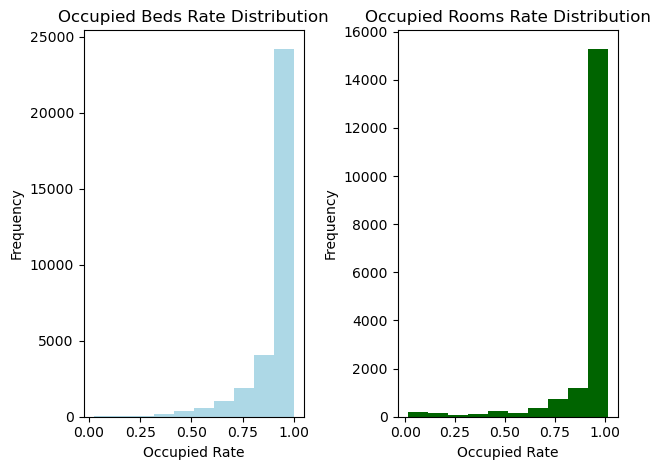

In [49]:
# Import relavant data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for 'OCCUPIED_BEDS_RATE' and 'OCCUPIED_ROOMS_RATE' side by side
plt.subplot(1,2,1)
plt.hist(df_beds['OCCUPIED_BEDS_RATE'],bins=10, color='lightblue')
plt.title('Occupied Beds Rate Distribution')
plt.xlabel('Occupied Rate')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df_rooms['OCCUPIED_ROOMS_RATE'],bins=10, color='darkgreen')
plt.title('Occupied Rooms Rate Distribution')
plt.xlabel('Occupied Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

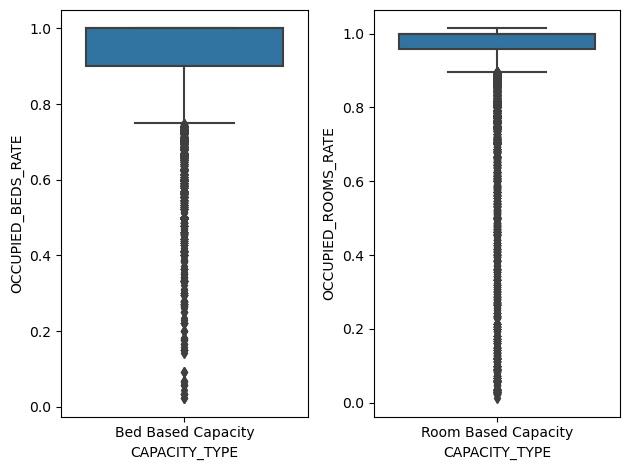

In [57]:
# Graph a boxplot for 'OCCUPIED_BEDS_RATE' and 'OCCUPIED_ROOMS_RATE'
plt.subplot(1,2,1)
sns.boxplot(x='CAPACITY_TYPE', y='OCCUPIED_BEDS_RATE', data=df_beds)

plt.subplot(1,2,2)
sns.boxplot(x='CAPACITY_TYPE', y='OCCUPIED_ROOMS_RATE', data=df_rooms)

plt.tight_layout()
plt.show()

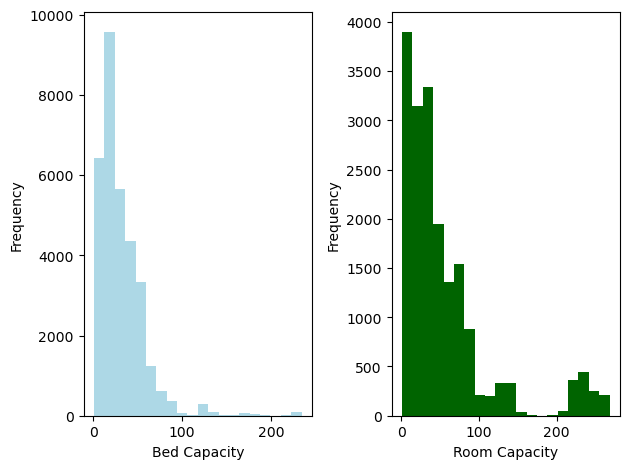

In [61]:
# Plot histogram for 'CAPACITY_ACTUAL_BED' and 'CAPACITY_ACTUAL_ROOM' side by side
plt.subplot(1,2,1)
plt.hist(df_beds['CAPACITY_ACTUAL_BED'],bins=20, color='lightblue')
plt.xlabel('Bed Capacity')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df_rooms['CAPACITY_ACTUAL_ROOM'],bins=20, color='darkgreen')
plt.xlabel('Room Capacity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

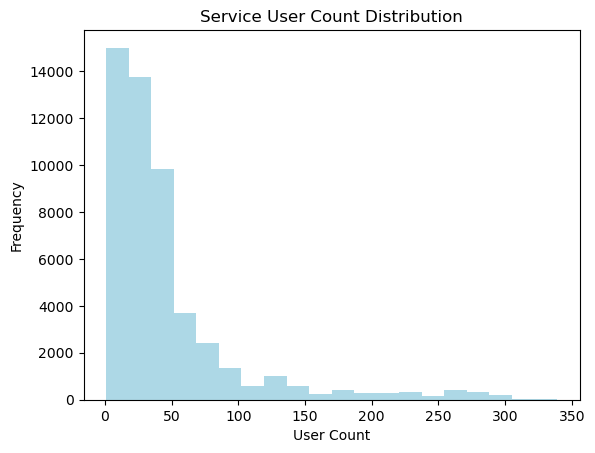

In [50]:
# Plot histogram for 'SERVICE_USER_COUNT'
plt.hist(df['SERVICE_USER_COUNT'],bins=20, color='lightblue')
plt.title('Service User Count Distribution')
plt.xlabel('User Count')
plt.ylabel('Frequency')
plt.show()

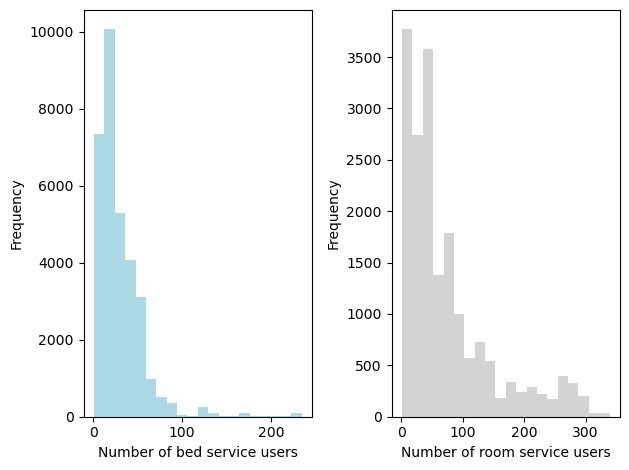

In [101]:
# Graph histogram for 'SERVICE_USER_COUNT' between different 'CAPACITY_TYPE' side by side
plt.subplot(1,2,1)
plt.hist(df_beds['SERVICE_USER_COUNT'],bins=20, color='lightblue')
plt.xlabel('Number of bed service users')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df_rooms['SERVICE_USER_COUNT'],bins=20, color='lightgrey')
plt.xlabel('Number of room service users')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

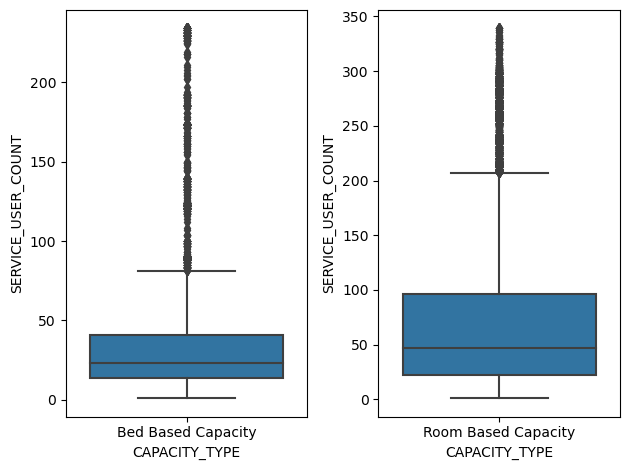

In [102]:
# Graph boxplot for 'SERVICE_USER_COUNT' between different 'CAPACITY_TYPE' side by side
plt.subplot(1,2,1)
sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', data=df_beds)

plt.subplot(1,2,2)
sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', data=df_rooms)

plt.tight_layout()
plt.show()

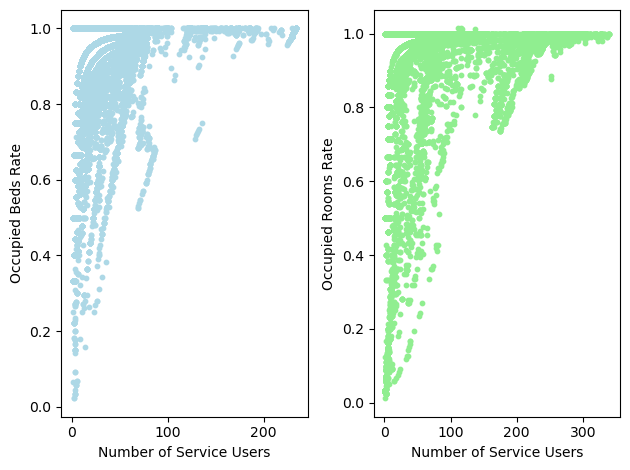

In [75]:
# Construct scatterplots for 'SERVICE_USER_COUNT' and the occupancy rates
plt.subplot(1,2,1)
plt.scatter(df_beds['SERVICE_USER_COUNT'], df_beds['OCCUPIED_BEDS_RATE'], s=10, color='lightblue')
plt.xlabel('Number of Service Users')
plt.ylabel('Occupied Beds Rate')

plt.subplot(1,2,2)
plt.scatter(df_rooms['SERVICE_USER_COUNT'], df_rooms['OCCUPIED_ROOMS_RATE'], s=10, color='lightgreen')
plt.xlabel('Number of Service Users')
plt.ylabel('Occupied Rooms Rate')

plt.tight_layout()
plt.show()